# Liên Kết Vào Database SQL SEVER

In [104]:
import pandas as pd
import pyodbc

# Thông tin kết nối
server = '45.117.83.230,1433'
database = 'DA_FINALTEST'
username = 'Student_DA_Q1'
password = '@MindXDream2023'

# Kết nối đến cơ sở dữ liệu
conn_str = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};'
conn = pyodbc.connect(conn_str)

# Truy vấn dữ liệu từ bảng Customer_Churn_Banker và đọc vào DataFrame
query = 'SELECT * FROM [dbo].[Customer_Churn_Banker]'
df = pd.read_sql(query, conn)

# In DataFrame
print(df)

# Đóng kết nối
conn.close()

      customer_id  credit_score  country  gender  age  tenure     balance  \
0        15634602           619   France  Female   42       2         0.0   
1        15647311           608    Spain  Female   41       1   8380786.0   
2        15619304           502   France  Female   42       8   1596608.0   
3        15701354           699   France  Female   39       1         0.0   
4        15737888           850    Spain  Female   43       2  12551082.0   
...           ...           ...      ...     ...  ...     ...         ...   
9995     15606229           771   France    Male   39       5         0.0   
9996     15569892           516   France    Male   35      10   5736961.0   
9997     15584532           709   France  Female   36       7         0.0   
9998     15682355           772  Germany    Male   42       3   7507531.0   
9999     15628319           792   France  Female   28       4  13014279.0   

      products_number  credit_card  active_member  estimated_salary  churn 

### In dữ liệu ra

In [105]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,10134888.0,1
1,15647311,608,Spain,Female,41,1,8380786.0,1,0,1,11254258.0,0
2,15619304,502,France,Female,42,8,1596608.0,3,1,0,11393157.0,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,9382663.0,0
4,15737888,850,Spain,Female,43,2,12551082.0,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.0,2,1,0,9627064.0,0
9996,15569892,516,France,Male,35,10,5736961.0,1,1,1,10169977.0,0
9997,15584532,709,France,Female,36,7,0.0,1,0,1,4208558.0,1
9998,15682355,772,Germany,Male,42,3,7507531.0,2,1,0,9288852.0,1


### In 5 hàng đầu

In [106]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,10134888.0,1
1,15647311,608,Spain,Female,41,1,8380786.0,1,0,1,11254258.0,0
2,15619304,502,France,Female,42,8,1596608.0,3,1,0,11393157.0,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,9382663.0,0
4,15737888,850,Spain,Female,43,2,12551082.0,1,1,1,790841.0,0


# Problem Statement

### Các ngân hàng đều muốn giữ chân khách hàng của mình để duy trì hoạt động kinh doanh và ngân hàng Đa quốc gia ABC cũng muốn điều đó.Dưới đây là dữ liệu khách hàng của các khách hàng tại Ngân hàng Đa quốc gia ABC có phát sinh giao dịch và mục đích của dữ liệu sẽ là dựđoán Tỷ lệ khách hàng rời bỏ.<br>
### Giả sử bạn là Data Analyst cho ngân hàng ABC. BOD đang cố gắng tìm hiểu xem tại sao lại xảy ra vấn đề trên và liệu người dùng các dịch vụ có rời bỏ ABC hay không (hủy sử dụng dịch vụ) trong vài ngày tới.

# Objective

### Bạn được yêu cầu xây dựng một mô hình dự đoán khách hàng sẽ rời bỏ hay tiếp tục sử dụng dịch vụ. Nó sẽ được team Strategy sử dụng để ước lượng số lượng khách hàng rời bỏ và lên các phương án cải thiện.

# Exploring Data Analysis (Tìm hiểu về dữ liệu-EDA)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [108]:
df.shape

(10000, 12)

In [109]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


In [110]:
df.isna().sum() #Check is null data

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [111]:
df.duplicated().sum() # kiểm tra dữ liệu bị trùng lặp

0

In [112]:
import numpy as np
df.isin([np.inf, -np.inf]).any() # kiểm tra infinity của dữ liệu

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

**Note**:
1. Bộ dữ liệu này gồm 10000 dòng và 12 cột
2. Chưa thấy cột dữ liệu nào bị rỗng ```null```
3. Không có cột dữ liệu nào chứa dạng infinity.
4. Hầu hết kiểu dữ liệu khá sạch, đều là float hoặc integer.Chỉ còn lại:
    -Cột ```country``` và ```gender``` có dạng string
    > Cần modify lại 2 cột này
    
Không cần phải tách cột thành các hạng mục nhỏ để dễ quan sát vì khá ít cột


# Kiểm tra thông tin từng cột

In [113]:
#Xóa cột không cần thiết
df_01=df.drop(columns='customer_id',axis=True)
df_01.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.0,1,1,1,10134888.0,1
1,608,Spain,Female,41,1,8380786.0,1,0,1,11254258.0,0
2,502,France,Female,42,8,1596608.0,3,1,0,11393157.0,1
3,699,France,Female,39,1,0.0,2,0,0,9382663.0,0
4,850,Spain,Female,43,2,12551082.0,1,1,1,790841.0,0


### Kiểm tra cột country và gender

### Country

In [114]:
df_01['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [115]:
df_01['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

### Gender

In [116]:
df_01['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [117]:
df_01['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

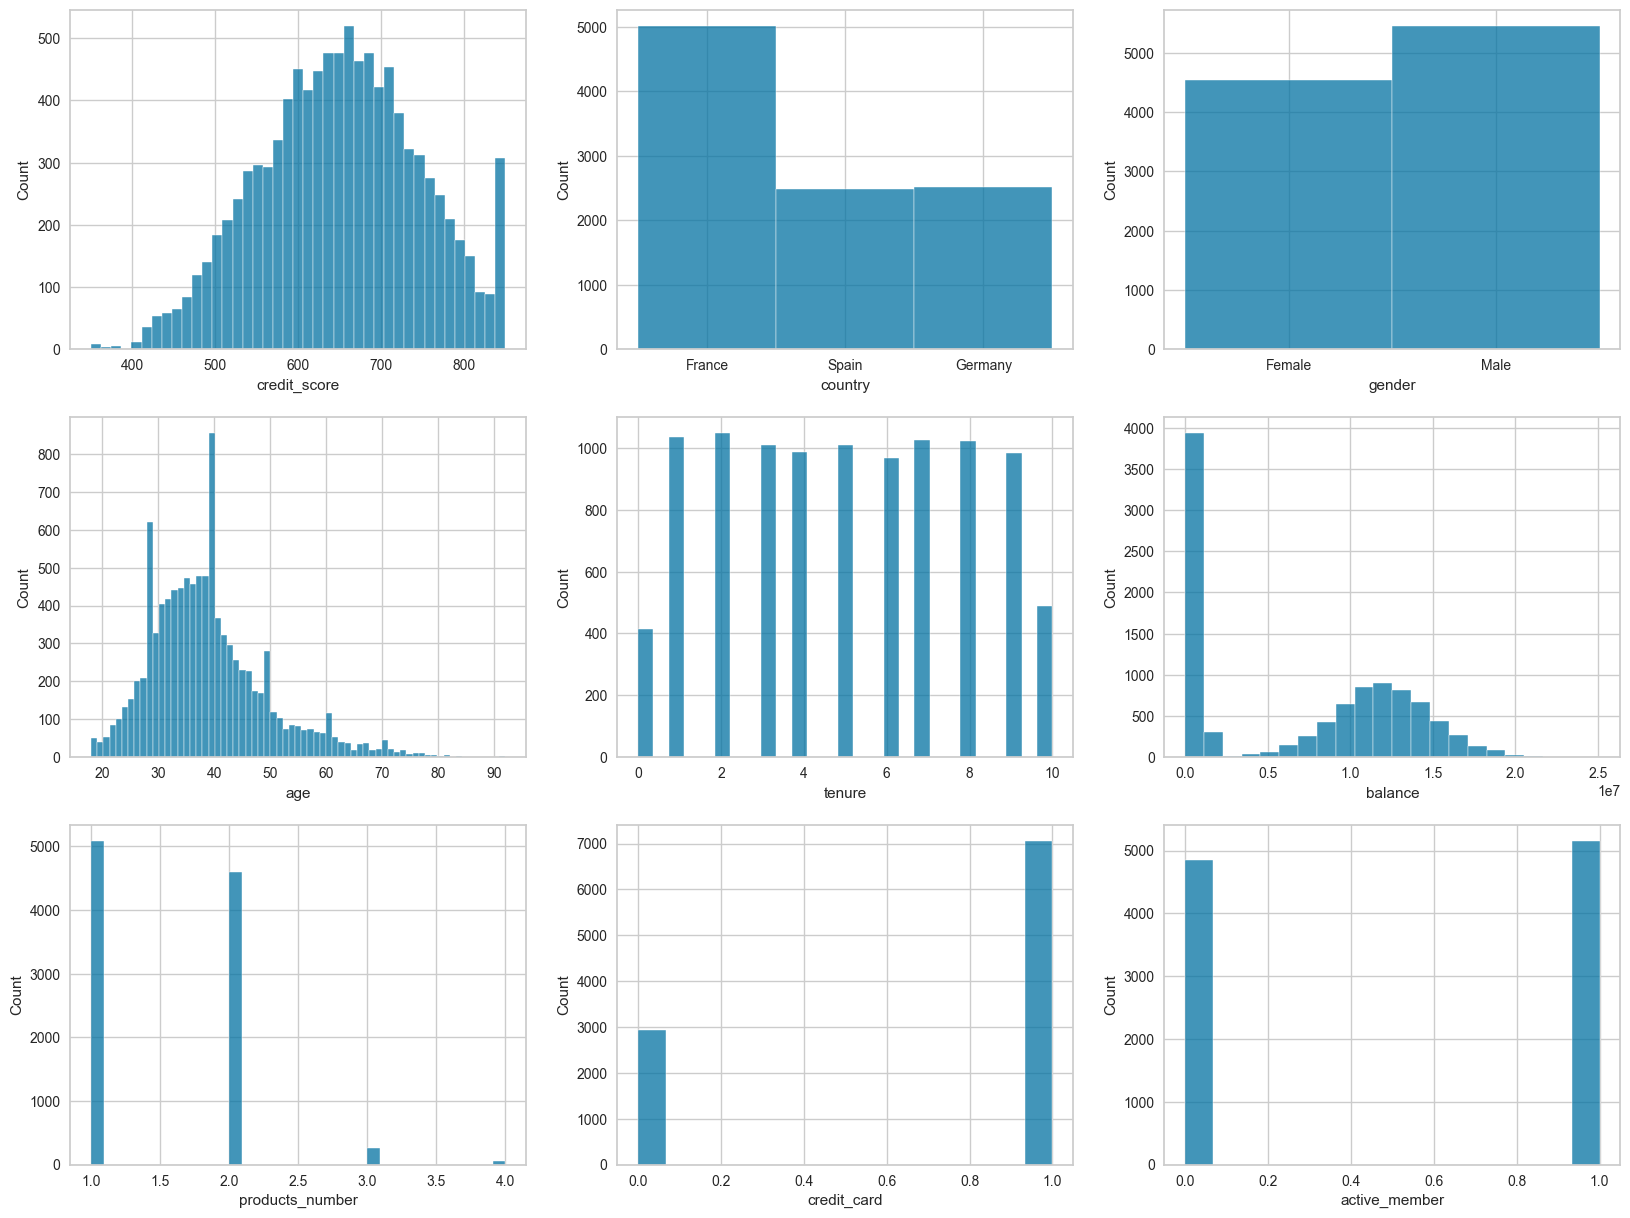

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=3, nrows=3, figsize= (20,15))

for col, ax in zip(df_01, axes.flat):
    sns.histplot(df_01[col], ax=ax)
plt.show()
df_01.describe()  

**Note**:
1. Cột ```Credit score``` có phân phối chuẩn trải đều.Tuy nhiên, điểm tín dụng lại tăng đột ngột ở mức trên 800
2. Nước Pháp có số người gấp đôi so với 2 nước còn lại
3. Female có tỷ lệ xấp xỉ gần bằng Male
4. Độ tuổi trung bình trong bộ dữ liệu này là 37,44 có số người cao nhất, thấp dần từ 60 đến 92
5. Số năm có tài khoản trải đều, chỉ có số năm 0 và 10 là có số người thấp
6. Rất nhiều người có số dư tài khoản là 0 ? Điều này có ảnh hưởng đến cột ```churn``` không?
7. Số lượng người sản phẩm của ngân hàng nhiều nhất là 1 và 2 sản phẩm. Tuy nhiên số lượng người mua 3 đến 4 sản phấm rất là thấp? Liệu có ảnh hưởng đến việc rời bỏ của khách hàng hay không?
8. Tỷ lệ người có thẻ tín dụng cao hơn so với người không dùng thẻ tín dụng.
9. Tỷ lệ người là thành viên của ngân hàng cao hơn 1 chút so với người không phải là thành viên ? Có ảnh hưởng đến việc khách hàng ròi bỏ hay không?



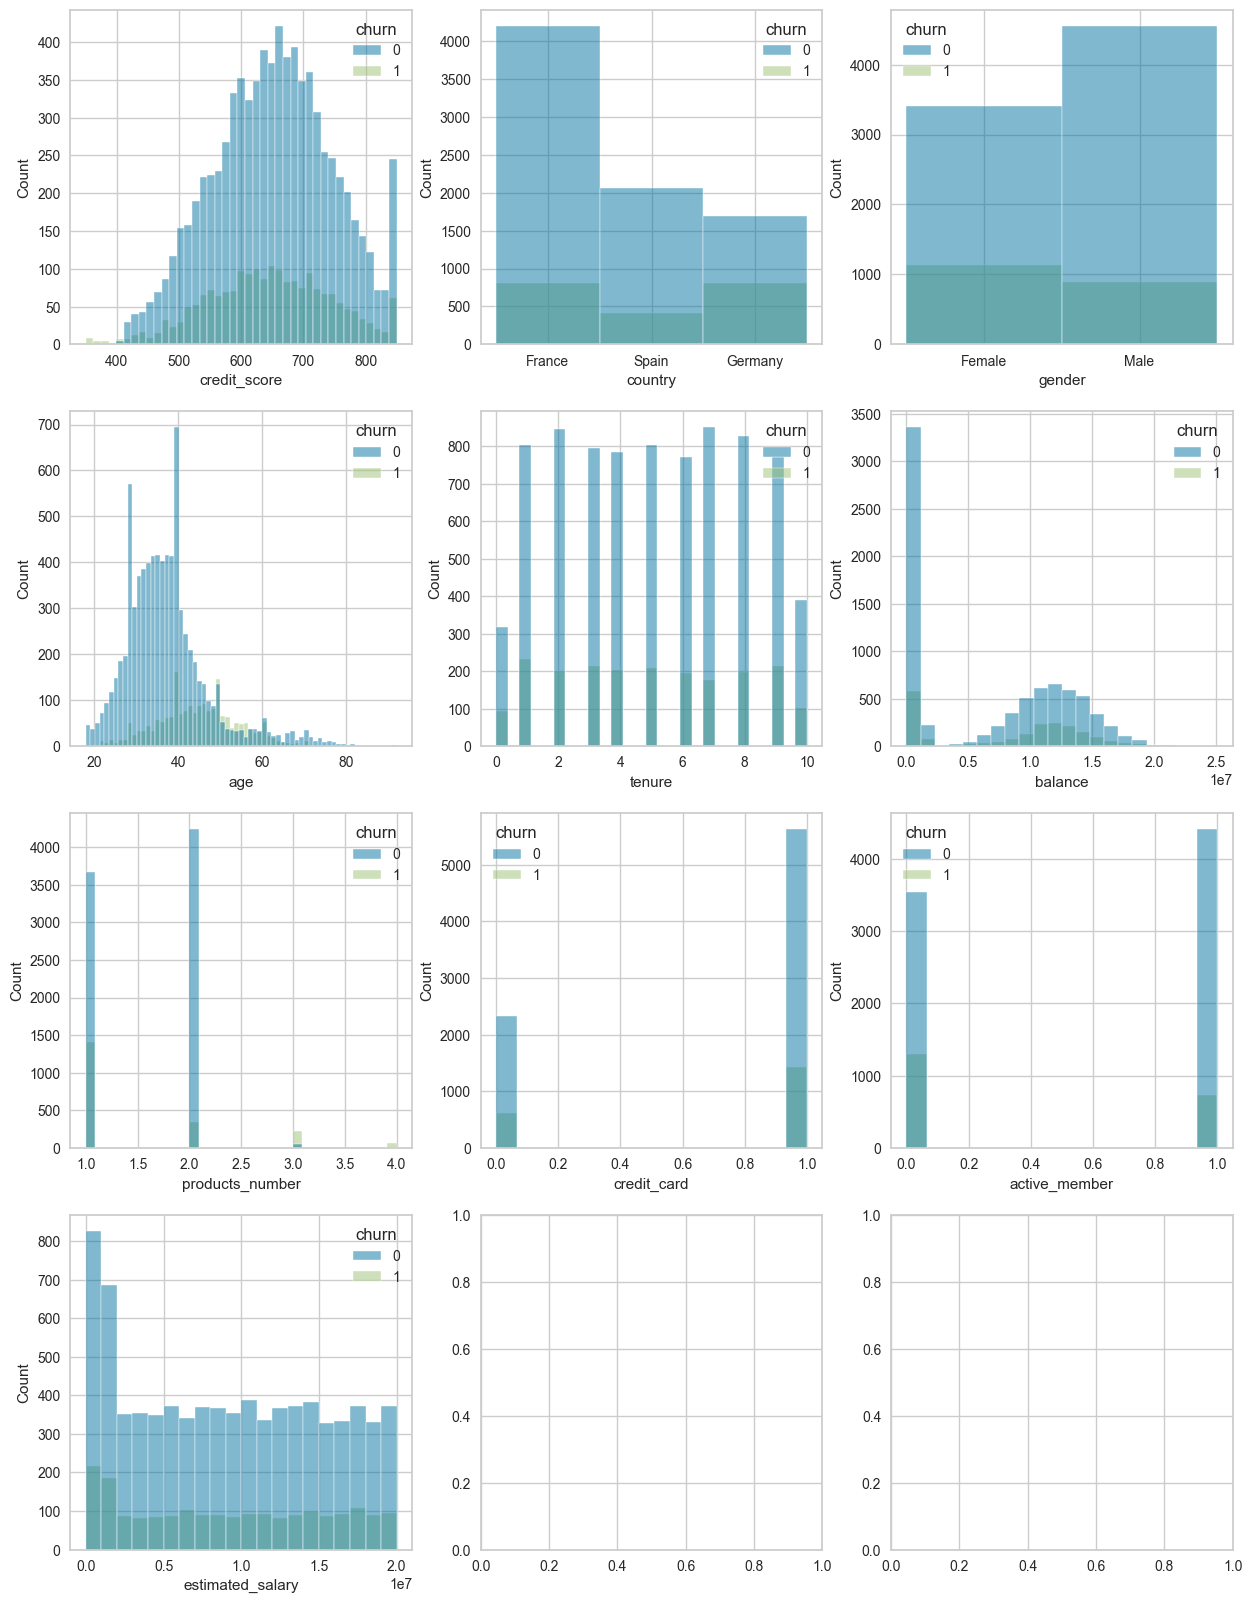

In [119]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df_01.columns)-1):
    sns.histplot(data=df_01, x=df_01.columns[i],hue="churn",ax=axs[i])

**Note**:
1. Tỷ lệ rời bỏ khách hàng trải đều cùng với ```credit_score```
2. Tỷ lệ rời bỏ của khách hàng ở Đức cao hơn so với các nước khác trong bộ dữ liệu
3. Tỷ lệ rời bỏ của nữ cao hơn so với nam
4. Nhóm tuổi có số người rời bỏ dịch vụ nằm ở khoảng từ 40 đến 50 tuổi
5. Nhóm người có số năm dịch vụ là 0 có tỷ lệ rời bỏ cao nhất so với các nhóm còn lại
6. Mức balance = 0 chưa chắc dẫn đến việc khách hàng rời bỏ dịch dụ
7. Số người rời bỏ khi đã có thẻ tín dụng cao hơn so với số người không thẻ (điều này chưa chắc phải cần tính tỷ lệ)
8. Số người không là thành viên rời bỏ dịch vụ cao hơn so với người là thành viên
9. Chưa thấy được sự ảnh hưởng rõ ràng của mức lương ảnh hưởng đến việc rời bỏ của khách hàng

In [120]:
churn_rate_by_tenure = df.groupby('tenure')['churn'].mean().reset_index()
print(churn_rate_by_tenure) 

    tenure     churn
0        0  0.230024
1        1  0.224155
2        2  0.191794
3        3  0.211100
4        4  0.205258
5        5  0.206522
6        6  0.202689
7        7  0.172179
8        8  0.192195
9        9  0.216463
10      10  0.206122


In [121]:
churn_rate_by_product_numbers = df_01.groupby('products_number')['churn'].mean().reset_index()
print(churn_rate_by_product_numbers)

   products_number     churn
0                1  0.277144
1                2  0.075817
2                3  0.827068
3                4  1.000000


In [122]:
df_01['products_number'].value_counts().reset_index()

,products_number,count
0,1,5084
1,2,4590
2,3,266
3,4,60


In [123]:
churn_rate_by_credit_card = df.groupby('credit_card')['churn'].mean()

print(churn_rate_by_credit_card)

credit_card
0    0.208149
1    0.201843
Name: churn, dtype: float64


# Data Preparation

In [124]:
#Encoding Column Country
from sklearn.preprocessing import OneHotEncoder
df_01 = pd.get_dummies(df_01, columns=["country"],drop_first=False)
df_01

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,Female,42,2,0.0,1,1,1,10134888.0,1,True,False,False
1,608,Female,41,1,8380786.0,1,0,1,11254258.0,0,False,False,True
2,502,Female,42,8,1596608.0,3,1,0,11393157.0,1,True,False,False
3,699,Female,39,1,0.0,2,0,0,9382663.0,0,True,False,False
4,850,Female,43,2,12551082.0,1,1,1,790841.0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.0,2,1,0,9627064.0,0,True,False,False
9996,516,Male,35,10,5736961.0,1,1,1,10169977.0,0,True,False,False
9997,709,Female,36,7,0.0,1,0,1,4208558.0,1,True,False,False
9998,772,Male,42,3,7507531.0,2,1,0,9288852.0,1,False,True,False


In [125]:
df_01.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,Female,42,2,0.0,1,1,1,10134888.0,1,True,False,False
1,608,Female,41,1,8380786.0,1,0,1,11254258.0,0,False,False,True
2,502,Female,42,8,1596608.0,3,1,0,11393157.0,1,True,False,False
3,699,Female,39,1,0.0,2,0,0,9382663.0,0,True,False,False
4,850,Female,43,2,12551082.0,1,1,1,790841.0,0,False,False,True


In [126]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   gender            10000 non-null  object 
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
 10  country_France    10000 non-null  bool   
 11  country_Germany   10000 non-null  bool   
 12  country_Spain     10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7), object(1)
memory usage: 810.7+ KB


In [127]:
df_01['gender'] = df['gender'].map({'Male':0, 'Female':1})
df_01

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,1,42,2,0.0,1,1,1,10134888.0,1,True,False,False
1,608,1,41,1,8380786.0,1,0,1,11254258.0,0,False,False,True
2,502,1,42,8,1596608.0,3,1,0,11393157.0,1,True,False,False
3,699,1,39,1,0.0,2,0,0,9382663.0,0,True,False,False
4,850,1,43,2,12551082.0,1,1,1,790841.0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.0,2,1,0,9627064.0,0,True,False,False
9996,516,0,35,10,5736961.0,1,1,1,10169977.0,0,True,False,False
9997,709,1,36,7,0.0,1,0,1,4208558.0,1,True,False,False
9998,772,0,42,3,7507531.0,2,1,0,9288852.0,1,False,True,False


In [128]:
corr= df_01.corr()

In [129]:
corr

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
credit_score,1.000000,0.002857,-0.003965,0.000842,0.006832,0.012238,-0.005458,0.025651,-0.000610,-0.027094,-0.008928,0.005538,0.004780
gender,0.002857,1.000000,0.027544,-0.014733,-0.006801,0.021859,-0.005766,-0.022544,0.010816,0.106512,-0.006772,0.024628,-0.016889
age,-0.003965,0.027544,1.000000,-0.009997,0.021754,-0.030680,-0.011721,0.085472,-0.015276,0.285323,-0.039208,0.046897,-0.001685
tenure,0.000842,-0.014733,-0.009997,1.000000,-0.016583,0.013444,0.022583,-0.028362,0.005657,-0.014001,-0.002848,-0.000567,0.003868
balance,0.006832,-0.006801,0.021754,-0.016583,1.000000,-0.276422,-0.011052,-0.010606,0.006023,0.105839,-0.209587,0.362681,-0.121481
products_number,0.012238,0.021859,-0.030680,0.013444,-0.276422,1.000000,0.003183,0.009612,0.013571,-0.047820,0.001230,-0.010419,0.009039
credit_card,-0.005458,-0.005766,-0.011721,0.022583,-0.011052,0.003183,1.000000,-0.011866,-0.006261,-0.007138,0.002467,0.010577,-0.013480
active_member,0.025651,-0.022544,0.085472,-0.028362,-0.010606,0.009612,-0.011866,1.000000,-0.005612,-0.156128,0.003317,-0.020486,0.016732
estimated_salary,-0.000610,0.010816,-0.015276,0.005657,0.006023,0.013571,-0.006261,-0.005612,1.000000,0.003151,-0.001138,0.011746,-0.010478
churn,-0.027094,0.106512,0.285323,-0.014001,0.105839,-0.047820,-0.007138,-0.156128,0.003151,1.000000,-0.104955,0.173488,-0.052667


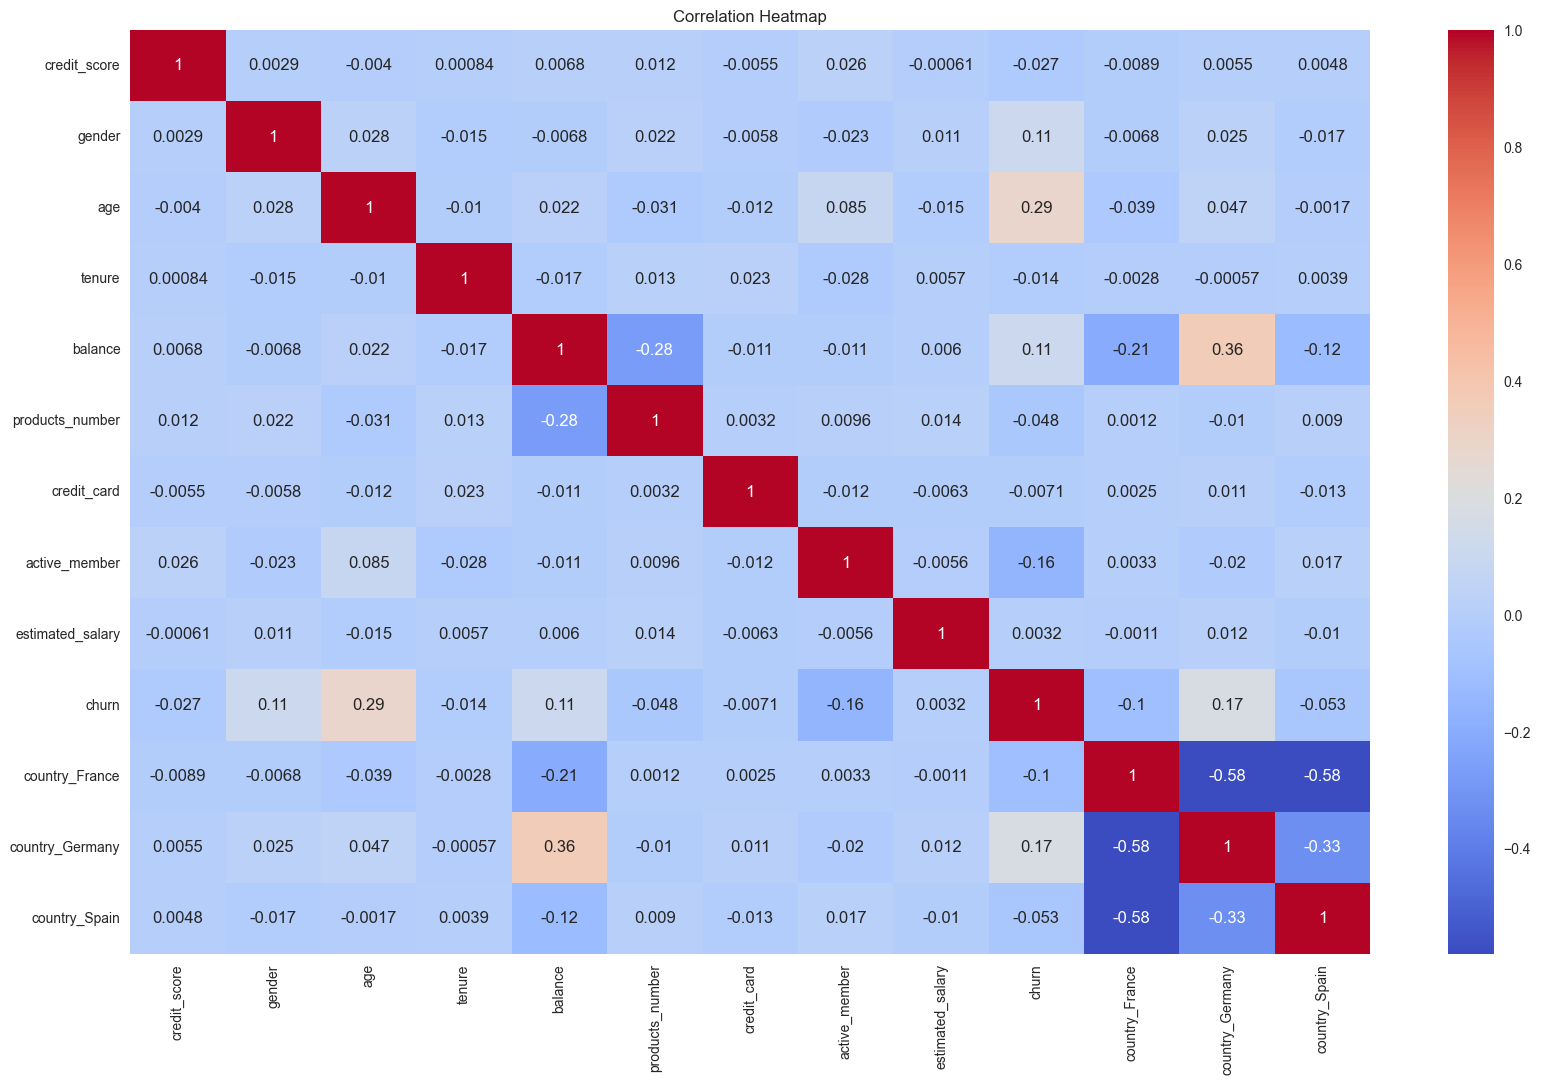

In [130]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

=> Điểm tương quan dữ liệu khá thấp

### Train/Test Split Data

In [131]:
X = df_01.drop(columns=['churn'])
Y = df_01['churn']

In [132]:
X.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
0,619,1,42,2,0.0,1,1,1,10134888.0,True,False,False
1,608,1,41,1,8380786.0,1,0,1,11254258.0,False,False,True
2,502,1,42,8,1596608.0,3,1,0,11393157.0,True,False,False
3,699,1,39,1,0.0,2,0,0,9382663.0,True,False,False
4,850,1,43,2,12551082.0,1,1,1,790841.0,False,False,True


In [133]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [134]:
Y.value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

=> Cần cân bằng lại dữ liệu

In [135]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X, Y = smote.fit_resample(X, Y)

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [137]:
X_train

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain
9960,795,1,33,9,1.045527e+07,1,1,1,1.208538e+07,False,True,False
6145,530,1,22,7,0.000000e+00,2,1,0,1.041705e+07,False,False,True
13882,708,0,24,4,0.000000e+00,1,0,0,1.642029e+07,True,False,True
12253,551,0,33,0,1.485520e+07,1,1,0,1.916234e+07,True,False,True
5590,775,0,25,10,6.020520e+05,2,1,0,1.407311e+06,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,557,1,43,5,1.177159e+06,3,1,0,7.014381e+06,False,True,False
3264,738,0,35,5,1.612740e+07,2,1,0,1.814299e+07,True,False,False
9845,590,1,38,9,0.000000e+00,2,1,1,1.487502e+07,False,False,True
10799,672,1,36,2,0.000000e+00,1,0,0,2.733876e+06,True,False,True


In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)

X_test_sc = sc.transform(X_test)

In [139]:
X_train_sc

array([[ 1.59519931,  1.22227645, -0.79150277, ..., -1.07705455,
         1.30934719, -0.63438203],
       [-1.27921443,  1.22227645, -1.89386058, ..., -1.07705455,
        -0.76373937,  1.57633721],
       [ 0.65152386, -0.81814552, -1.69343189, ...,  0.92845808,
        -0.76373937,  1.57633721],
       ...,
       [-0.62840377,  1.22227645, -0.29043103, ..., -1.07705455,
        -0.76373937,  1.57633721],
       [ 0.26103746,  1.22227645, -0.49085972, ...,  0.92845808,
        -0.76373937,  1.57633721],
       [-0.27045791,  1.22227645,  0.71171244, ..., -1.07705455,
         1.30934719, -0.63438203]])

In [140]:
# Time for Classification Models
import time

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#Khai báo các thuật toán phân lớp sử dụng
dict_classifiers = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=5000),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(gamma = 'auto'),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [141]:
no_classifiers = len(dict_classifiers.keys())

#Xây dựng hàm huấn luyện theo các thuật toán
#Xác định thời gian chạy khi huấn luyện của mỗi thuật toán
#Cho biết Độ chính xác của mô hình khi chạy huấn luyện
#Thời gian chạy huấn luyện của mô hình
def batch_classify(X_train_sc, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train_sc, Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train_sc, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [142]:
#Thực hiện việc huấn luyện các mô hình với dữ liệu huấn luyện
df_results = batch_classify(X_train_sc, y_train,verbose=True)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.02 s
trained Nearest Neighbors in 0.03 s


trained Linear SVM in 2.12 s
trained Gradient Boosting Classifier in 1.42 s
trained Decision Tree in 0.05 s
trained Random Forest in 0.20 s
trained Neural Net in 2.44 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.046875
5                 Random Forest     0.996591       0.203125
1             Nearest Neighbors     0.888500       0.031250
2                    Linear SVM     0.870022       2.125000
3  Gradient Boosting Classifier     0.869752       1.421875
6                    Neural Net     0.858809       2.437500
0           Logistic Regression     0.808576       0.015625
7                   Naive Bayes     0.786598       0.000000


## Vấn đề Overfitting trong xây dựng mô hình ML
---
Overfitting không phải là một thuật toán trong Machine Learning. Nó là một hiện tượng không mong muốn thường gặp, người xây dựng mô hình Machine Learning cần nắm được các kỹ thuật để tránh hiện tượng này.

Overfitting là hiện tượng mô hình tìm được quá khớp với dữ liệu training. Việc quá khớp này có thể dẫn đến việc dự đoán nhầm nhiễu, và chất lượng mô hình không còn tốt trên dữ liệu test nữa. Dữ liệu test được giả sử là không được biết trước, và không được sử dụng để xây dựng các mô hình Machine Learning.

Về cơ bản, overfitting xảy ra khi mô hình quá phức tạp để mô phỏng training data. Điều này đặc biệt xảy ra khi lượng dữ liệu training quá nhỏ trong khi độ phức tạp của mô hình quá cao.
![alt text](https://machinelearningcoban.com/assets/15_overfitting/linreg_val.png)

[link tham khảo thêm](https://machinelearningcoban.com/2017/03/04/overfitting/)

In [143]:
#SO SÁNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH ML TRONG KHI TRAIN VÀ KHI TEST VỚI 2 MÔ HÌNH CÓ ĐỘ CHÍNH XÁC CAO NHÂT
# Model: Desicion Tree - acc = 100% khi Train
# Model: Random Forest - acc = 99.7% khi Train

print('Model: Desicion Tree')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train_sc, y_train)

acc_decision_tree = round(decision_tree.score(X_train_sc, y_train) * 100, 3)
print("Độ chính xác của mô hình Decision tree trên tập Train: ", acc_decision_tree, "%")
#--------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = decision_tree.predict(X_test_sc)
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình Decision tree trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Desicion Tree
Độ chính xác của mô hình Decision tree trên tập Train:  100.0 %
Độ chính xác của mô hình Decision tree trên tập Test: 83.01


In [144]:
print('Model: Random Forest')
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=100)
random_forest.fit(X_train_sc, y_train)
#Đánh giá độ chính xác trên tập huấn luyện:
acc_random_forest = round(random_forest.score(X_train_sc, y_train) * 100, 3)
print("Độ chính xác của mô hình Random Forest trên tập Train: ", acc_random_forest, "%")
#---------------------------------------------------------------------------------------
#Sử dụng mô hình Train chạy dữ liệu TEST và đánh giá độ chính xác
Y_pred = random_forest.predict(X_test_sc)
print("Độ chính xác của mô hình Random Forest trên tập Test:", round(accuracy_score(y_test,Y_pred)*100,2))

Model: Random Forest


Độ chính xác của mô hình Random Forest trên tập Train:  100.0 %
Độ chính xác của mô hình Random Forest trên tập Test: 87.88


Như ở trên ta thấy: Với mô hình Decision tree khi huấn luyện TRAIN độ chính xác đạt 100% (rất cao), tuy nhiên mô hình ấy khi sử dụng cho tập TEST độ chính xác chỉ đạt 82.46% (rất thấp), Tương tự với mô hình Random Forest, độ chính xác khi huấn luyện ~100%, tuy nhiên độ chính xác trên tập TEST chỉ đạt 87,71% ==> OVERFITTING (Hiện tượng mô hình có độ chính xác khi TRAIN cao (sai số nhỏ) nhưng khi chạy với dữ liệu TEST thì độ chính xác lại thấp (sai số cao) - Hình minh họa

In [145]:
# Sử dụng  Cross-validation để giải quyết vấn đề overfitting.
#Mỗi thuật toán thực hiện 3 lần huấn luyện trên tập TRAIN với kỹ thuật Cross Validation,
#
#---------------------------------------------------------------

from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)
log_scores = cross_val_score(log_reg, X_train_sc, y_train, cv=5)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC(gamma='auto')
svc_scores = cross_val_score(svc_clf, X_train_sc, y_train, cv=5)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train_sc, y_train, cv=5)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train_sc, y_train, cv=5)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train_sc, y_train, cv=5)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train_sc, y_train, cv=5)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train_sc, y_train, cv=5)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train_sc, y_train, cv=5)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'],
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [146]:
#Hiển thị kết quả của các thuật toán với kỹ thuật Cross Validation
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
5,Rand FC,0.868586
4,Grad B CLF,0.861769
1,SVC,0.858091
6,Neural Classifier,0.856118
7,Naives Bayes,0.856118
2,KNN,0.837998
3,Dec Tree,0.815391
0,Logistic Reg.,0.807499


## Lựa chọn thuật toán ML tốt nhất và chạy cho dữ liệu TEST
---

In [147]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#grad_clf = GradientBoostingClassifier()
y_train_pred = cross_val_predict(grad_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#grad_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Gradient Boost Classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred))

TRAIN: Gradient Boost Classifier accuracy is 0.8618


In [148]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#neural_clf = MLPClassifier(alpha=1)
y_train_pred_n = cross_val_predict(neural_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#neural_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Neural classifier accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_n))

TRAIN: Neural classifier accuracy is 0.8556


In [149]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#nav_clf = GaussianNB()
y_train_pred_nb = cross_val_predict(nav_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#nav_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Navie Bayes accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_nb))

TRAIN: Navie Bayes accuracy is 0.7862


In [150]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

#neural_clf = MLPClassifier(alpha=1)
y_train_pred_n = cross_val_predict(rand_clf, X_train_sc, y_train, cv=5)
from sklearn.metrics import accuracy_score
#neural_clf.fit(X_train, y_train)
#Độ chính xác tính trên tập TRAIN:
print ("TRAIN: Random Forest Classifer accuracy is %2.4f" % accuracy_score(y_train, y_train_pred_n))

TRAIN: Random Forest Classifer accuracy is 0.8662


In [151]:
# Khởi tạo mô hình
rand_clf = RandomForestClassifier()

# Huấn luyện mô hình trên dữ liệu huấn luyện
rand_clf.fit(X_train_sc, y_train)

# Dự đoán kết quả với dữ liệu kiểm tra
y_predicted = rand_clf.predict(X_test_sc)

In [152]:
#Hàm predict cho biết kết quả dự đoán của mô hình phân lớp là class nào?
# (0 hay 1 trong trường hợp phân lớp nhị phân)
y_predicted = rand_clf.predict(X_test_sc)
y_predicted

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [153]:
y_predicted_probas =rand_clf.predict_proba(X_test_sc)
y_predicted_probas

array([[0.19, 0.81],
       [0.5 , 0.5 ],
       [0.14, 0.86],
       ...,
       [0.12, 0.88],
       [0.25, 0.75],
       [0.61, 0.39]])

#  ĐÁNH GIÁ ĐỘ CHÍNH XÁC CỦA CÁC MÔ HÌNH PHÂN LỚP
---
Độ đo accuracy thể hiện tỷ lệ giữa số điểm đự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.

In [154]:
from sklearn.metrics import accuracy_score
print("TEST: Random Forest Classifier accuracy is %2.4f" % accuracy_score(y_test,y_predicted))

TEST: Random Forest Classifier accuracy is 0.8782


Sau khi sử dụng cross validation ta thấy độ chính xác của model Random Forest với tập TRAIN đạt 86.6 % với tập TEST đạt 87.8% (khắc phục được overfitting)

##  Confusion matrix
---
Cách tính sử dụng accuracy như ở trên chỉ cho chúng ta biết được bao nhiêu phần trăm lượng dữ liệu được phân loại đúng mà không chỉ ra được cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất, và dữ liệu thuộc lớp nào thường bị phân loại nhầm vào lớp khác. Để có thể đánh giá được các giá trị này, chúng ta sử dụng một ma trận được gọi là confusion matrix.

Về cơ bản, confusion matrix thể hiện có bao nhiêu điểm dữ liệu thực sự thuộc vào một class, và được dự đoán là rơi vào một class. Để hiểu rõ hơn, hãy xem hình minh họa trong phần trực quan hóa.

In [155]:
#Hiển thị confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[2102  282]
 [ 300 2094]]


In [156]:
len(y_test)

4778

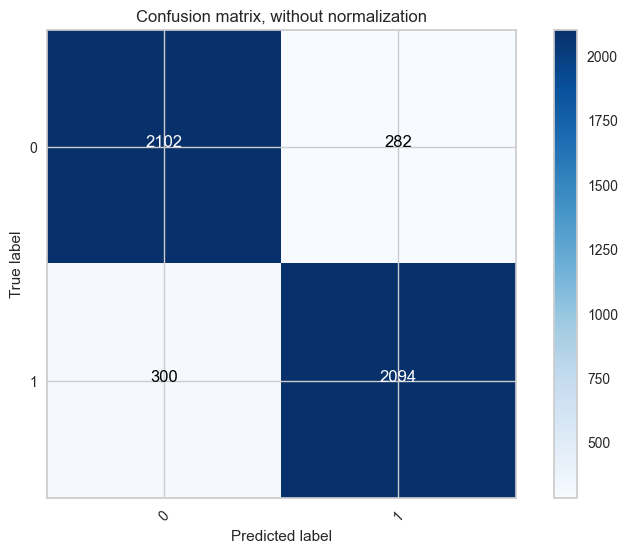

In [157]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#f, ax = plt.subplots(1,2, figsize=(14,6))
# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix là một ma trận vuông với kích thước mỗi chiều bằng số lượng lớp dữ liệu. Giá trị tại hàng thứ i, cột thứ j là số lượng điểm lẽ ra thuộc vào class i nhưng lại được dự đoán là thuộc vào class j.
Như vậy, nhìn vào confusion matrix (without normalization):
* Hàng (0),cột (0): cho biết số điểm thuộc lớp 0 được phân đúng vào lớp 0 (2102 điểm.
* Hàng (0), cột (1): Số điểm thuộc lớp 0 nhưng lại được phân vào lớp 1 (phân lớp sai) 282 điểm.
* Hàng (1), Cột (0): Số điểm thuộc lớp 1 nhưng lại được phân vào lớp 0 (phân lớp sai) 300 điểm
* Hàng (1), cột (1): Số điểm thuộc lớp 1 được phân đúng vào lớp 1 (2094 điểm)

Chúng ta có thể suy ra ngay rằng tổng các phần tử trong toàn ma trận này chính là số điểm trong tập TEST. Các phần tử trên đường chéo của ma trận là số điểm được phân loại đúng của mỗi lớp dữ liệu. Từ đây có thể suy ra accuracy chính bằng tổng các phần tử trên đường chéo chia cho tổng các phần tử của toàn ma trận.

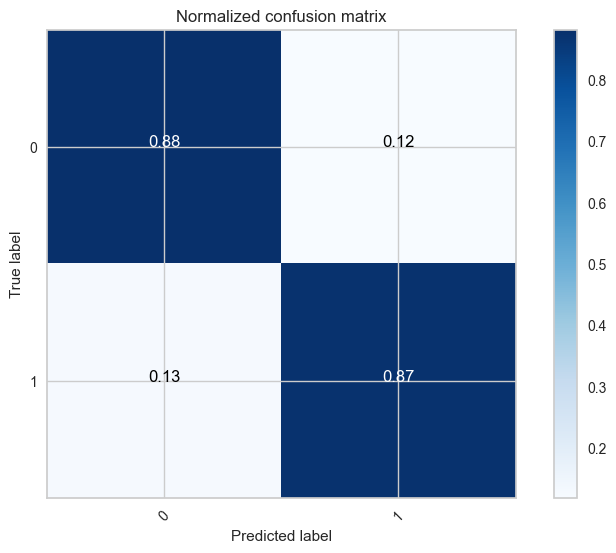

In [158]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Để có cái nhìn rõ hơn, ta có thể dùng normalized confuion matrix, tức confusion matrix được chuẩn hoá. Để có normalized confusion matrix, ta lấy mỗi hàng của unnormalized confusion matrix sẽ được chia cho tổng các phần tử trên hàng đó. Như vậy, ta có nhận xét rằng tổng các phần tử trên một hàng của normalized confusion matrix luôn bằng 1. Điều này thường không đúng trên mỗi cột. Confusion matrix thường được minh hoạ bằng màu sắc để có cái nhìn rõ ràng hơn.
Với các bài toán với nhiều lớp dữ liệu, cách biểu diễn bằng màu này rất hữu ích. Các ô màu đậm thể hiện các giá trị cao. Một mô hình tốt sẽ cho một confusion matrix có các phần tử trên đường chéo chính có giá trị lớn, các phần tử còn lại có giá trị nhỏ.

##  Precision, Recal, F1 score
---

Thư viện yellobrick cho phép trực quan hóa các kết quả của mô hình ML

[link webstie Yellowbrick](https://www.scikit-yb.org/en/latest/)


Báo cáo phân loại
Trình hiển thị báo cáo phân loại hiển thị precision, recall, F1, và support scores cho mô hình. Để hỗ trợ việc diễn giải và phát hiện vấn đề dễ dàng hơn, báo cáo tích hợp điểm số với bản đồ nhiệt được mã hóa màu. Tất cả các bản đồ nhiệt đều nằm trong phạm vi (0,0, 1,0) để tạo điều kiện so sánh dễ dàng các mô hình phân loại trên các báo cáo phân loại khác nhau.

In [159]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassPredictionError


import warnings
warnings.filterwarnings('ignore')

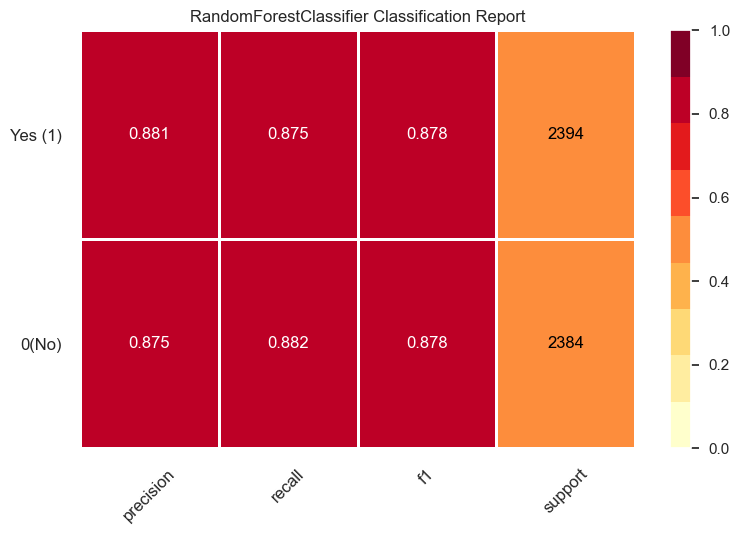

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [160]:

# Specify the target classes
classes = ["0(No)", "Yes (1)"]

visualizer = ClassificationReport(rand_clf, classes=classes, support=True)

visualizer.fit(X_train_sc, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_sc, y_test)        # Evaluate the model on the test data
visualizer.poof()                       # Draw/show/poof the data

Báo cáo phân loại hiển thị bản trình bày các số liệu phân loại chính trên cơ sở từng lớp. Điều này mang lại trực giác sâu sắc hơn về hành vi của bộ phân loại đối với độ chính xác tổng thể, điều này có thể che giấu những điểm yếu về chức năng trong một lớp của bài toán nhiều lớp. Báo cáo phân loại trực quan được sử dụng để so sánh các mô hình phân loại với các mô hình chọn lọc “đỏ hơn”, ví dụ: có số liệu phân loại mạnh hơn hoặc cân bằng hơn.

Các số liệu được xác định theo kết quả dương tính đúng và sai cũng như âm tính đúng và sai. Tích cực và tiêu cực trong trường hợp này là tên chung cho các lớp của bài toán phân loại nhị phân. Trong ví dụ trên, chúng ta sẽ xem xét có người ở đúng và sai và không có người ở đúng và sai. Do đó, giá trị dương thực sự là khi lớp thực tế cũng dương như lớp ước tính. Kết quả dương tính giả là khi lớp thực tế âm nhưng lớp ước tính là dương. Sử dụng thuật ngữ này, các thước đo được định nghĩa như sau:

#### Precision
Độ chính xác là khả năng của người phân loại không gắn nhãn một trường hợp dương tính mà thực tế là âm tính. Đối với mỗi lớp, nó được định nghĩa là tỷ lệ của kết quả dương tính đúng với tổng số kết quả dương tính đúng và sai. Nói cách khác, “đối với tất cả các trường hợp được phân loại là dương tính, bao nhiêu phần trăm là đúng?”

#### recall
Nhớ lại là khả năng của một bộ phân loại để tìm thấy tất cả các trường hợp tích cực. Đối với mỗi loại, nó được định nghĩa là tỷ lệ của kết quả dương tính thực với tổng số kết quả dương tính thực và âm tính giả. Nói cách khác, “đối với tất cả các trường hợp thực sự dương tính, bao nhiêu phần trăm được phân loại chính xác?”

#### f1-score
Điểm F1 là giá trị trung bình hài hòa có trọng số của độ chính xác và khả năng thu hồi sao cho điểm tốt nhất là 1,0 và điểm tệ nhất là 0,0. Nói chung, điểm F1 thấp hơn các thước đo độ chính xác vì chúng đưa độ chính xác và khả năng thu hồi vào tính toán của chúng. Theo nguyên tắc chung, nên sử dụng giá trị trung bình có trọng số của F1 để so sánh các mô hình phân loại, chứ không phải độ chính xác toàn cầu.

#### Support
Hỗ trợ là số lần xuất hiện thực tế của lớp trong tập dữ liệu đã chỉ định. Hỗ trợ không cân bằng trong dữ liệu huấn luyện có thể chỉ ra điểm yếu về cấu trúc trong điểm số được báo cáo của bộ phân loại và có thể cho thấy sự cần thiết phải lấy mẫu phân tầng hoặc tái cân bằng. Hỗ trợ không thay đổi giữa các mô hình mà thay vào đó chẩn đoán quá trình đánh giá.

### Confusion Matrix
Mục đích chính của Confusion Matrix là để xem mô hình của ta hoạt động như thế nào khi phân loại khách hàng tiềm năng có khả năng đăng ký tiền gửi có kỳ hạn. Chúng ta sẽ thấy trong ma trận nhầm lẫn bốn thuật ngữ là Dương tính thật, Dương tính giả, Âm tính thật và Âm tính giả.

Positive/Negative: Loại Lớp (nhãn) ["No", "Yes"] True/False: Phân loại đúng hoặc sai theo mô hình.

True Negatives (Top-Left Square) phân loại chính xác loại "Không" hoặc khách hàng tiềm năng không sẵn sàng đăng ký tiền gửi có kỳ hạn.

False Negatives (Top-Right Square)  phân loại không chính xác loại "Không" hoặc các khách hàng tiềm năng không sẵn sàng đăng ký tiền gửi có kỳ hạn.<br>

False Positives (Bottom-Left Square) phân loại không chính xác loại "Có" hoặc khách hàng tiềm năng sẵn sàng đăng ký tiền gửi có kỳ hạn.<br>

True Positives (Bottom-Right Square) phân loại chính xác loại "Có" hoặc khách hàng tiềm năng sẵn sàng đăng ký gửi tiền có kỳ hạn.